In [7]:
# Housing O reily - Page 70

In [8]:
import pandas as pd

In [9]:
train_df = pd.read_csv("housing.csv")
train_df.shape

(20640, 10)

In [10]:
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [11]:
train_df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

# Visualize the Data

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

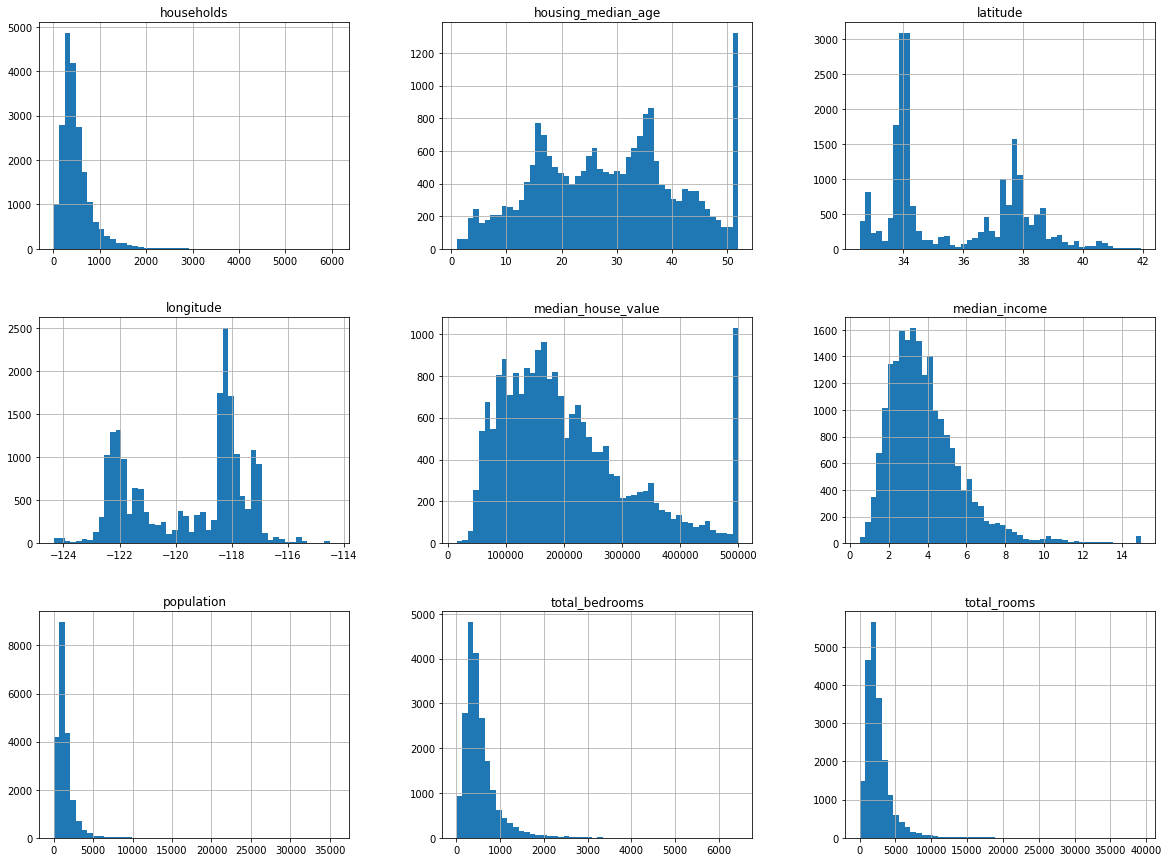

In [13]:
train_df.hist(bins=50, figsize=(20,15))
plt.show()

In [14]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
train_set, test_set = train_test_split(train_df, test_size=0.2, random_state=42)

In [15]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN


# Discover	and	Visualize	the	Data	to	Gain	Insights

In [16]:
# Create a copy of train_set
housing = train_set.copy()

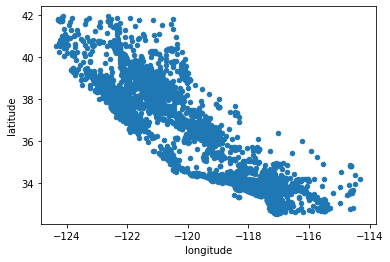

In [17]:
housing.plot(kind="scatter", x="longitude",	y="latitude")

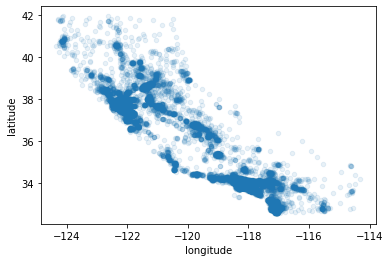

In [18]:
housing.plot(kind="scatter", x="longitude",	y="latitude", alpha=0.1)

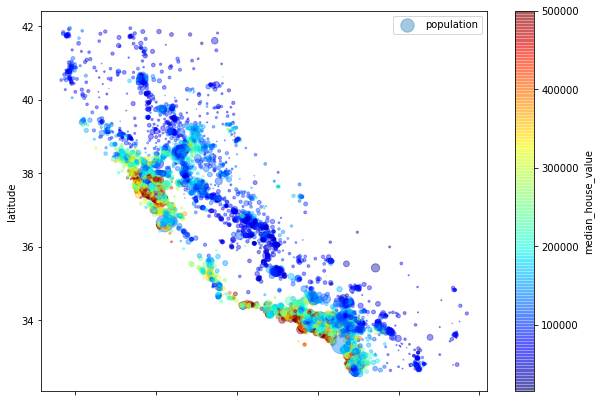

In [19]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,s=housing["population"]/100,label="population",figsize=(10,7),c="median_house_value",cmap=plt.get_cmap("jet"),	colorbar=True,)
plt.legend()

# Identifying correlations between attributes

In [20]:
# Pearson's correlation

In [21]:
corr = housing.corr()
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924485,-0.101818,0.038676,0.063064,0.094276,0.049306,-0.017040,-0.046349
latitude,-0.924485,1.000000,0.005296,-0.029224,-0.059998,-0.102499,-0.064061,-0.076571,-0.142983
housing_median_age,-0.101818,0.005296,1.000000,-0.360922,-0.320624,-0.292283,-0.302796,-0.121711,0.103706
total_rooms,0.038676,-0.029224,-0.360922,1.000000,0.930489,0.857936,0.920482,0.198268,0.133989
total_bedrooms,0.063064,-0.059998,-0.320624,0.930489,1.000000,0.878932,0.980255,-0.009141,0.047980
population,0.094276,-0.102499,-0.292283,0.857936,0.878932,1.000000,0.907452,0.004122,-0.026032
households,0.049306,-0.064061,-0.302796,0.920482,0.980255,0.907452,1.000000,0.012776,0.063714
median_income,-0.017040,-0.076571,-0.121711,0.198268,-0.009141,0.004122,0.012776,1.000000,0.690647
median_house_value,-0.046349,-0.142983,0.103706,0.133989,0.047980,-0.026032,0.063714,0.690647,1.000000


In [22]:
# Visualizing correlation
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6991e56d50>,
      dtype=object)

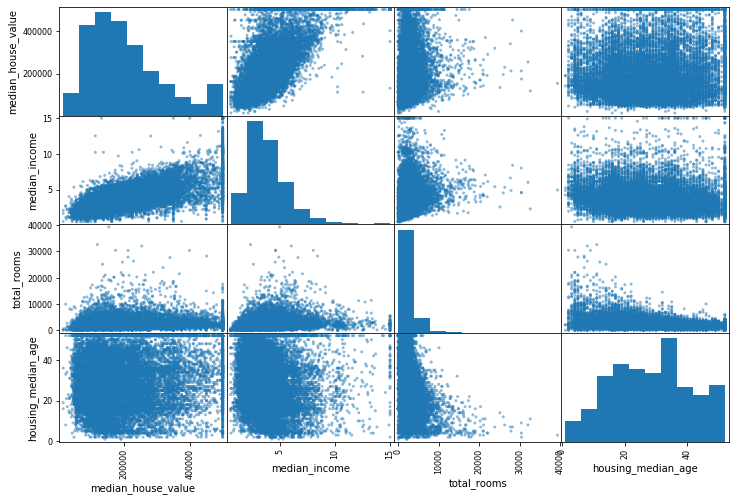

In [23]:
scatter_matrix(housing[['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']], figsize=(12,8))

In [24]:
# Create new attributes for effective learning
housing['rooms_per_household'] = housing["total_rooms"] / housing['households']
housing["bedrooms_per_room"]	=	housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [25]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN,5.017657,0.200576,3.691814
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN,4.473545,0.232703,1.738095
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN,5.645833,0.174486,2.723214
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN,4.002817,0.258269,3.994366
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND,6.268421,0.180940,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN,6.129032,0.151128,3.032258
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND,6.868597,0.184825,3.904232
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN,3.986717,0.270823,3.332068
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN,6.395349,0.166993,3.178891


In [26]:
# Check correlation matrix again
corr = housing.corr()
corr['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.690647
rooms_per_household         0.158485
total_rooms                 0.133989
housing_median_age          0.103706
households                  0.063714
total_bedrooms              0.047980
population_per_household   -0.022030
population                 -0.026032
longitude                  -0.046349
latitude                   -0.142983
bedrooms_per_room          -0.257419
Name: median_house_value, dtype: float64

# Prepare the data for training

In [27]:
# Ignore the old housing as we were using that to gain insights only, hence revert to old df
housing = train_df.drop("median_house_value", axis=1)
housing_labels = train_df["median_house_value"].copy()

In [28]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


* Imputer - Helps in filling the missing attributes - ONLY NUMERICAL ATTRIBUTES

In [29]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [30]:
# Drop the non-numerical attributes to impute
housing_numerical = housing.drop("ocean_proximity", axis=1)

In [31]:
# Fit imputer instance on training data
imputer.fit(housing_numerical)
print(imputer.statistics_)

[-118.49     34.26     29.     2127.      435.     1166.      409.
    3.5348]


In [32]:
# Now as imputer has all the medians, fill this in the dataframe 
X = imputer.transform(housing_numerical)
# Since imputer outputs an array, convert back to dataframe
housing_tr=pd.DataFrame(X,	columns=housing_numerical.columns)
# Add the non-numerical attributes back to this
housing_tr['ocean_proximity'] = housing["ocean_proximity"]
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [33]:
# Convert the labels to one hot vectors using LabelBinarizer
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()

# Binarizing using get_dummies
housing_classified = pd.get_dummies(housing, columns=['ocean_proximity'])
housing_classified.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

# Using pipeline from sklearn to do all the things at once

In [34]:
class NewLabelBinarizer(LabelBinarizer):
    def fit(self, X, y=None):
        return super(NewLabelBinarizer, self).fit(X)
    def transform(self, X, y=None):
        return super(NewLabelBinarizer, self).transform(X)
    def fit_transform(self, X, y=None):
        return super(NewLabelBinarizer, self).fit(X).transform(X)

In [35]:
numerical_attributes = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
category_attributes = ['ocean_proximity']

In [36]:
# Create a pipeline for both types of attributes, defining a operations in each tuple
from sklearn.pipeline import Pipeline
from sklearn_features.transformers import DataFrameSelector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

numerical_pipeline = Pipeline([('selector', DataFrameSelector(numerical_attributes)),
                               ('imputer', SimpleImputer(strategy="median")),
                               ('std_scaler', StandardScaler()),
                              ])
category_pipeline = Pipeline([('selector', DataFrameSelector(category_attributes)),
                              ('label_binarizer', NewLabelBinarizer())
                              ])

In [37]:
# Combine these pipelines now
from sklearn.pipeline import FeatureUnion
full_pipeline = FeatureUnion(transformer_list=[('numerical_pipeline', numerical_pipeline),
                                               ('category_pipeline', category_pipeline)])

In [38]:
# Run the combined pipeline now 
housing_prepared = full_pipeline.fit_transform(housing)

In [42]:
housing_prepared

array([[-1.32783522,  1.05254828,  0.98214266, ...,  0.        ,
         1.        ,  0.        ],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.        ,
         1.        ,  0.        ],
       [-1.33282653,  1.03850269,  1.85618152, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87362627,  1.77823747, -0.84539315, ...,  0.        ,
         0.        ,  0.        ],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.        ,
         0.        ,  0.        ]])

# Training the model

In [39]:
# 1. LinearRegression 
from sklearn.linear_model import LinearRegression

In [40]:
linear_regression_model = LinearRegression()

In [41]:
linear_regression_model.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
# Check the predictions on the total training set - Just for gigs
from sklearn.metrics import mean_squared_error
import numpy as np
housing_predictions = linear_regression_model.predict(housing_prepared)

# Calculate the mean squared error
mse = mean_squared_error(housing_predictions, housing_labels)
# Print RSME - Root(mean squared error)
print(np.sqrt(mse))

68709.32557762168


In [38]:
# 2. DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

decision_tree_regressor_model = DecisionTreeRegressor() 

In [39]:
decision_tree_regressor_model.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [40]:
# Check the predictions on the total training set - Just for gigs
housing_predictions = decision_tree_regressor_model.predict(housing_prepared)

# print the RMSE
rmse = np.sqrt(mean_squared_error(housing_predictions, housing_labels)) 
print(rmse)

0.0


In [41]:
# 3. RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
forest_regreessor_model = RandomForestRegressor()

In [42]:
forest_regreessor_model.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [37]:
# Check the predictions on the total training set - Just for gigs
from sklearn.metrics import mean_squared_error
import numpy as np
housing_predictions = linear_regression_model.predict(housing_prepared)

# Calculate the mean squared error
mse = mean_squared_error(housing_predictions, housing_labels)
# Print RSME - Root(mean squared error)
print(np.sqrt(mse))

68709.32557762168


In [44]:
housing_predictions = forest_regreessor_model.predict(housing_prepared)
rmse = np.sqrt(mean_squared_error(housing_predictions, housing_labels))
rmse

17876.093309178254